# **HEART ATTACK PREDICTION**
This project focuses on estimating the risk of a heart attack by utilizing various machine learning algorithms. The dataset includes multiple health-related attributes linked to cardiac health. In this notebook, we will perform exploratory analysis, preprocess the data, train several models, and compare their results to identify the most effective one.

# **Import Libraries**
First, we import the necessary libraries for data manipulation, visualization, and machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv('/content/dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
cat_cols = ['sex', 'exang', 'ca', 'cp', 'fbs', 'restecg', 'slope', 'thal']
con_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
target_col = 'target'


Print column information

In [ ]:
print("The categorial cols are: ", cat_cols)

The categorial cols are:  ['sex', 'exang', 'ca', 'cp', 'fbs', 'restecg', 'slope', 'thal']


In [ ]:
print("The continuous cols are: ", con_cols)

The continuous cols are:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [ ]:
print("The target variable is: ", target_col)

The target variable is:  target


## **Data Visualization**

**PAIRPLOT**

### Use a pairplot to visualize the pairwise relationships between continuous features.

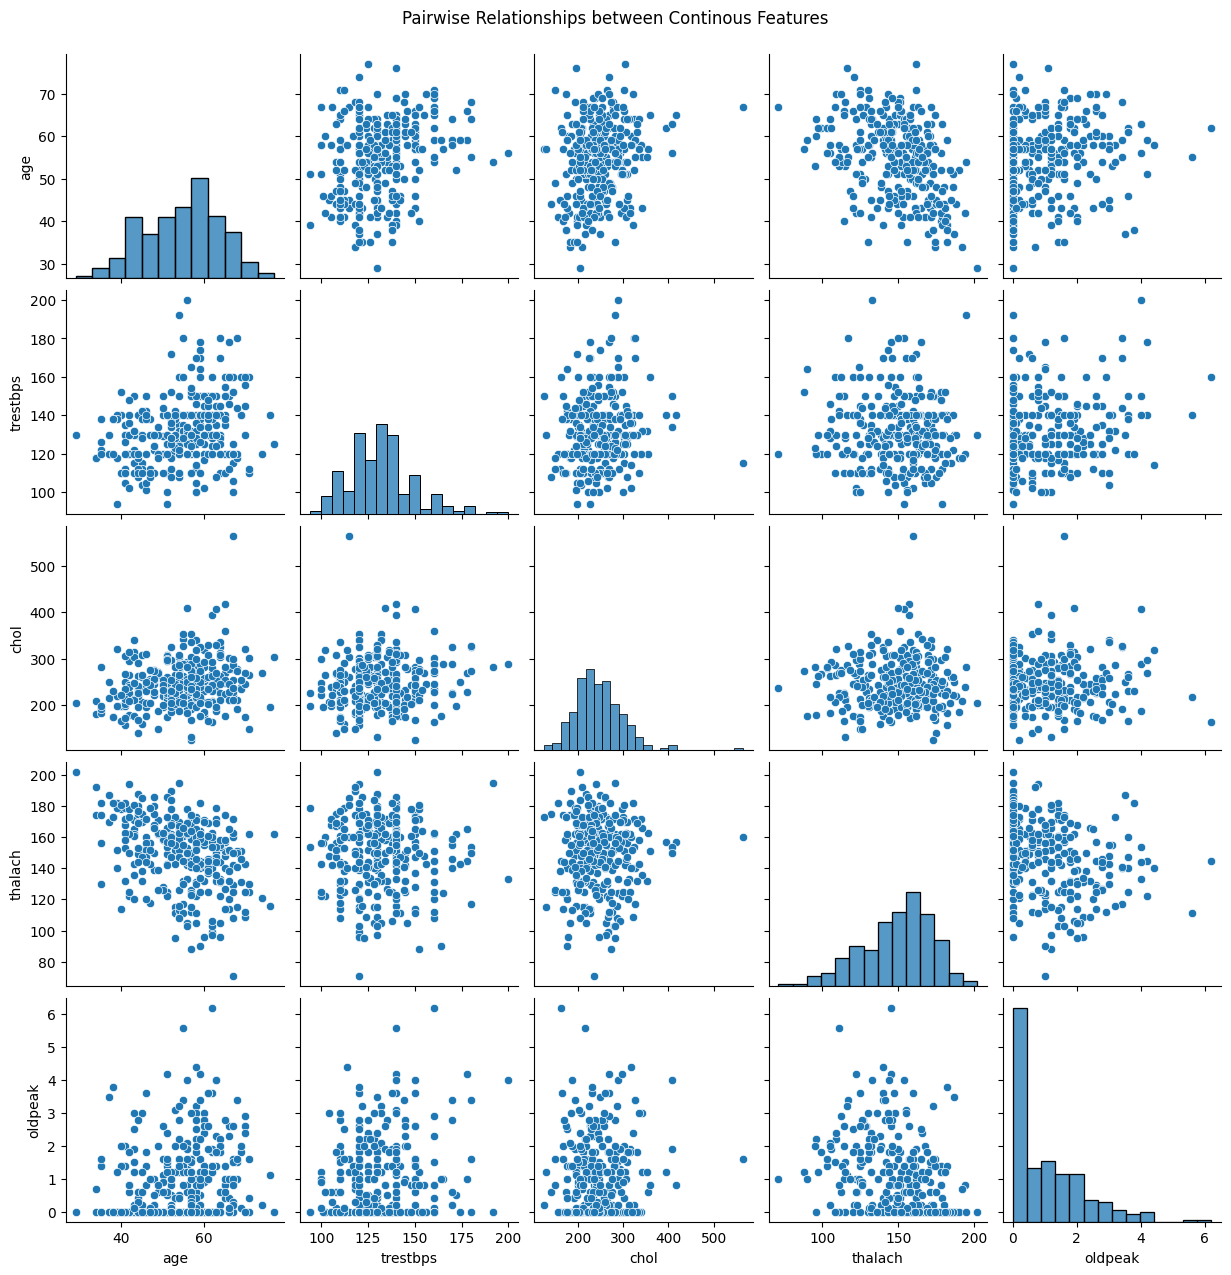

In [ ]:
# Pairplot visualization
sns.pairplot(data[con_cols])
plt.suptitle("Pairwise Relationships between Continous Features", y= 1.02)
plt.show()

**Handling missing values and removing duplicates**

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

**Correlation matrix of continuous features**

In [ ]:
print(data[con_cols].dtypes)

age           int64
trestbps      int64
chol          int64
thalach       int64
oldpeak     float64
dtype: object


In [ ]:
data_corr = data[con_cols].corr().transpose()
print(data_corr)

               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.283121  0.207216 -0.395235  0.206040
trestbps  0.283121  1.000000  0.125256 -0.048023  0.194600
chol      0.207216  0.125256  1.000000 -0.005308  0.050086
thalach  -0.395235 -0.048023 -0.005308  1.000000 -0.342201
oldpeak   0.206040  0.194600  0.050086 -0.342201  1.000000


**Visualize correlation matrix**

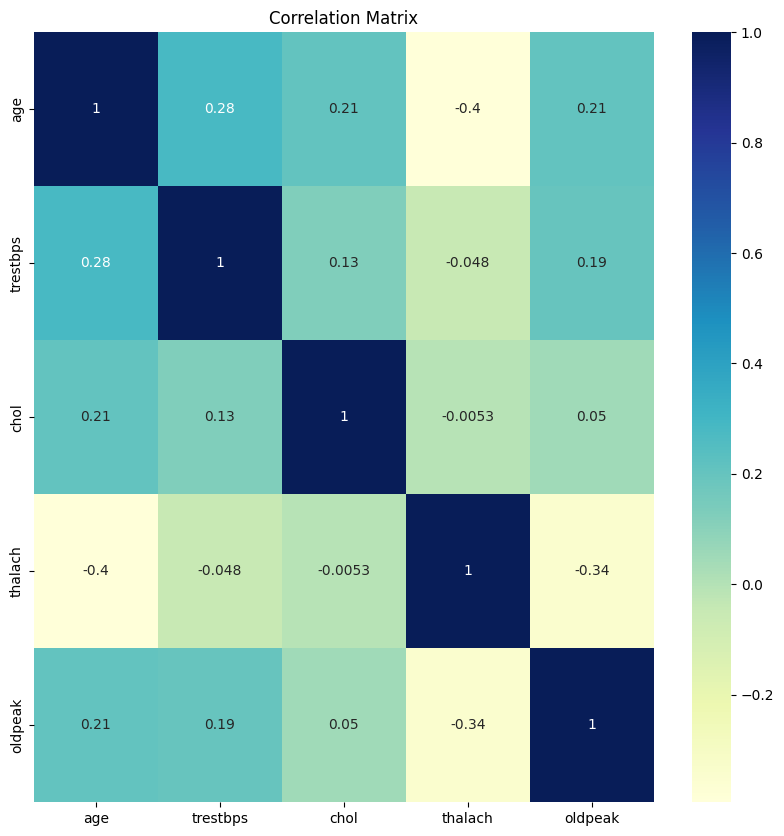

In [ ]:
data_corr = data[con_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

## **Feature Selection**

In [ ]:
X = data.drop(target_col, axis=1)
y = data[target_col]

Calculate correlation-based feature ranking

In [ ]:
# Calculate correlation coefficients for each feature
correlation_scores = np.abs(X.corrwith(y))

In [ ]:
variances = np.var(X, axis=0)
feature_scores = 0.7 * correlation_scores + 0.3 * variances
ranked_features = feature_scores.sort_values(ascending=False).index
selected_features = ranked_features[:7]

Select features

In [ ]:
X_selected = X[selected_features]

In [ ]:
print(X_selected)

     chol  thalach  trestbps  age  oldpeak  cp  ca
0     233      150       145   63      2.3   3   0
1     250      187       130   37      3.5   2   0
2     204      172       130   41      1.4   1   0
3     236      178       120   56      0.8   1   0
4     354      163       120   57      0.6   0   0
..    ...      ...       ...  ...      ...  ..  ..
298   241      123       140   57      0.2   0   0
299   264      132       110   45      1.2   3   0
300   193      141       144   68      3.4   0   2
301   131      115       130   57      1.2   0   1
302   236      174       130   57      0.0   1   1

[302 rows x 7 columns]


**Data preprecessing**

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_selected)

**Split data into train and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Model Training and Evaluation**

We train and evaluate several machine learning models. includig SVM, Logistic Regression, Decision Tree, Random Forest and Gradient Boosting

### **1- Support Vector Machine (SVM)**

In [ ]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

In [ ]:
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))


SVM:
Accuracy: 0.819672131147541
Precision: 0.8181818181818182
Recall: 0.84375
F1 Score: 0.8307692307692308


### **2-Logistic Regression**

In [ ]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear').fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [ ]:
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))


Logistic Regression:
Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Recall: 0.8125
F1 Score: 0.8253968253968254


### **3-Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.8032786885245902
Precision: 0.8846153846153846
Recall: 0.71875
F1 Score: 0.7931034482758621


### **4-Random Forest**

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1 Score: 0.84375



### **5- Gradient Boosting**

In [ ]:
gbt = GradientBoostingClassifier(n_estimators=300, max_depth=1, subsample=0.8, max_features=0.2, random_state=42)
gbt.fit(X_train, y_train)
y_pred_gbt = gbt.predict(X_test)

In [ ]:
print("\nGradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbt))
print("Precision:", precision_score(y_test, y_pred_gbt))
print("Recall:", recall_score(y_test, y_pred_gbt))
print("F1 Score:", f1_score(y_test, y_pred_gbt))


Gradient Boosting:
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1 Score: 0.8709677419354839


## **Comparison of Different Models**

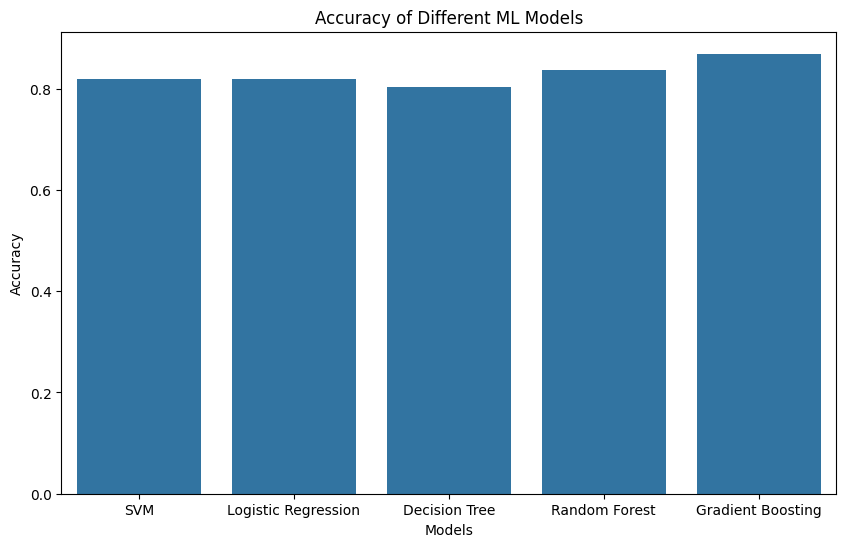

In [ ]:
# Bar chart comparison of different ML models
models = ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gbt)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title("Accuracy of Different ML Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()


### **DEFINING MODELS WITH HYPERPARAMETERS FOR TUNING**

Defining models with hyperparameters for tuning and perform hyperparameter tuning for each model using GridSearchCV.

In [ ]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

Hyperparameter grids for each model

In [ ]:
param_grids = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [100, 200, 500] },
    'Decision Tree': {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200],'max_depth': [None, 5, 10, 20]},
    'Gradient Boosting': {'n_estimators': [300], 'max_depth':[1], 'subsample':[0.8], 'max_features':[0.2], 'random_state':[42]}
}

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


Perform hyperparameter tuning for each model

In [ ]:
from sklearn.model_selection import GridSearchCV
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

In [ ]:
# Evaluate the tuned models
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


SVM:
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1 Score: 0.84375

Logistic Regression:
Accuracy: 0.8032786885245902
Precision: 0.8125
Recall: 0.8125
F1 Score: 0.8125

Decision Tree:
Accuracy: 0.8032786885245902
Precision: 0.8846153846153846
Recall: 0.71875
F1 Score: 0.7931034482758621

Random Forest:
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384616

Gradient Boosting:
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1 Score: 0.8709677419354839



**Select the best model based on performance**

In [ ]:
accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in best_estimators.items()}
best_model_name = max(accuracies, key=accuracies.get)
best_model = best_estimators[best_model_name]
print(f"The best model is {best_model_name} with an accuracy of {accuracies[best_model_name]}")


The best model is Gradient Boosting with an accuracy of 0.8688524590163934


# **USER BASED INTERFACE**


Use the best model to make predictions

In [ ]:
new_data = {
    "age": float(input("Enter age: ")),
    "cp": int(input("Enter cp (chest pain type 0-3): ")),
    "trestbps": float(input("Enter resting blood pressure (mm Hg): ")),
    "chol": float(input("Enter serum cholestoral in mg/dl: ")),
    "thalach": float(input("Enter maximum heart rate achieved: ")),
    "oldpeak": float(input("Enter ST depression induced by exercise relative to rest: ")),
    "ca": int(input("Enter number of major vessels colored by flourosopy (0-3): "))
}

# Create DataFrame with feature names and scale the input data
input_df = pd.DataFrame([new_data])
X_scaled = scaler.transform(input_df[selected_features])
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Make predictions using the best model
prediction = best_model.predict(X_scaled_df)
print("Predicted probability of having a heart attack:", prediction)

Enter age: 90
Enter cp (chest pain type 0-3): 1
Enter resting blood pressure (mm Hg): 160
Enter serum cholestoral in mg/dl: 80
Enter maximum heart rate achieved: 2.4
Enter ST depression induced by exercise relative to rest: 3
Enter number of major vessels colored by flourosopy (0-3): 1
Predicted probability of having a heart attack: [0]
